#### Declare global variables
- use poisson process to model passing time and gate time

In [182]:
%load_ext autoreload
%autoreload 2
import numpy as np
import matplotlib.pyplot as plt
from utils.doors import DoorType
from utils.line import Line
from utils.params import Params
plt.style.use('ggplot')
params = Params()
np.random.seed(42) # need to ensure # people generated is same for both line

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


#### Simulation of different type of doors

In [183]:
normalLine = Line(DoorType.normal)
openLine = Line(DoorType.keepOpen)

In [184]:
for i in range(50):
    normalLine.forward()

In [185]:
normalPass, openPass = [], []
normal, open = 0, 0
for i in range(100):
    normalLine.forward()
    openLine.forward()
    normal, open = normalLine.PassingCounter, openLine.PassingCounter
    normalPass.append(normal)
    openPass.append(open)

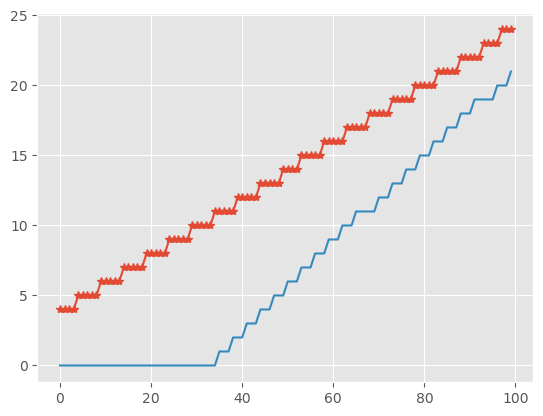

In [186]:
plt.plot(normalPass, '*-', label='normal')
plt.plot(openPass, label='open')

#### Statistic measurements for the performance of doors
- average queue length
- passing number in a given period of time

In [187]:
def average_queue_length():
    """
    Returns
    -------
    avg_normal: float
        average queue length for normal door
    avg_open: float
        average queue length for keep open door
    normal_num, open_num: list
        queue length for normal and open door
    """
    normalLine = Line(DoorType.normal)
    openLine = Line(DoorType.keepOpen)
    while 0 == normalLine.PassingCounter:
        # simulate still reaching stable condition
        normalLine.forward()
    while 0 == openLine.PassingCounter:
        openLine.forward()
    # average queue length
    sim_step = 10000 * params.timestep
    curr_step, counter = 0, 0
    normal_num, open_num = [], []
    while curr_step < sim_step:
        normalLine.forward()
        openLine.forward()
        curr_step += params.timestep
        if curr_step % int(4*params.timestep) == 0:
            normal_num.append(normalLine.count_occupied())
            open_num.append(openLine.count_occupied())
            counter += 1
    return sum(normal_num) / counter, sum(open_num) / counter, normal_num, open_num

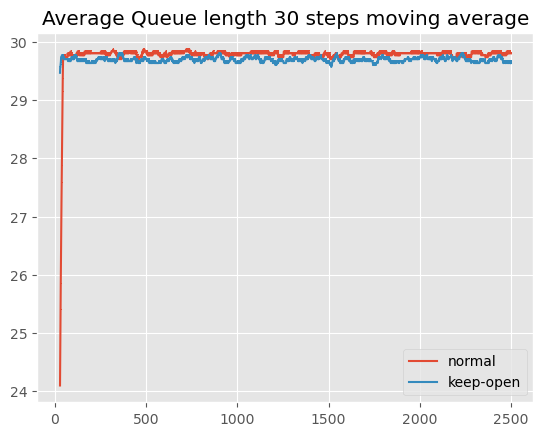

In [188]:
avg_normal, avg_open, normal_queue, open_queue = average_queue_length()
import pandas as pd
normal_queue = pd.Series(normal_queue)
open_queue = pd.Series(open_queue)
plt.plot(normal_queue.rolling(window=30).mean(), ',-', label='normal')
plt.plot(open_queue.rolling(window=30).mean(), ',-', label='keep-open')
plt.title('Average Queue length 30 steps moving average')
plt.legend()

In [189]:
print(f"average length for normal: {avg_normal}, average length for open: {avg_open}")

average length for normal: 29.7232, average length for open: 29.6888


Arrival times: [0.07289476 0.11073824 0.17239372 0.3117809  0.67545864 0.74235373
 0.77668754 0.84021368 0.86149189 1.38411831 1.79624094 1.87001697
 1.92675174 2.39836563 2.39872033 2.58226745 3.0776641  3.21974616
 3.22034044 3.26974354 3.78108834 3.78452213 3.88495471 4.19684129
 4.56098544 4.69085282 4.74377195 4.92688251 4.98812723 5.0470724
 5.3767079  5.41021794 5.41132529 5.49345356 5.62850477 5.87271527
 6.17655727 6.39440011 6.59137232 6.81054477 6.87390558 6.97027591
 7.16192593 7.17548978 7.2454936  7.3498099  7.50228392 7.635578
 7.8888412  8.01711413 8.48606653 8.58177641 8.73082108 8.73146419
 8.80581551 9.20865563 9.28982158 9.3482095  9.50505901 9.52145945
 9.67314817 9.74553328 9.84214389]


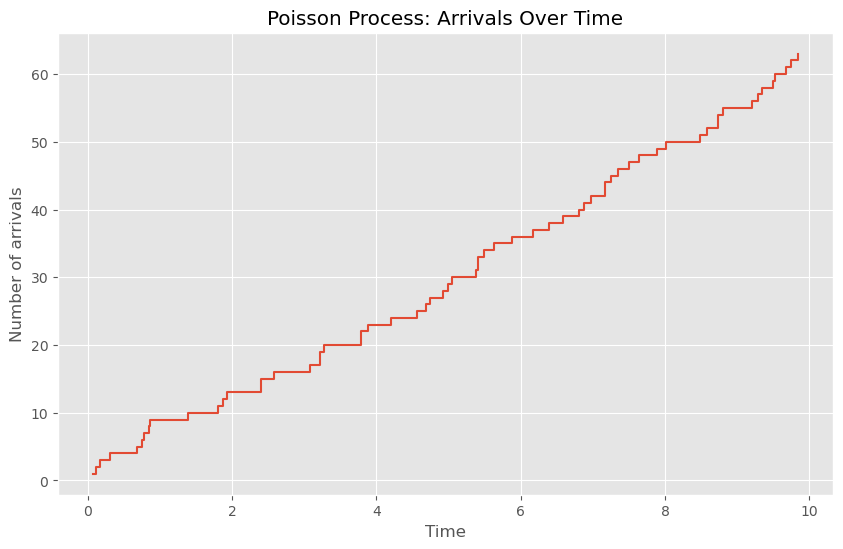

In [190]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
lambda_rate = 5  # average rate (people per unit time)
time_period = 10  # total time period for the simulation

# Generate inter-arrival times
inter_arrival_times = np.random.exponential(1/lambda_rate, int(lambda_rate * time_period * 1.5))

# Generate arrival times by taking the cumulative sum of inter-arrival times
arrival_times = np.cumsum(inter_arrival_times)

# Filter arrival times to be within the time period
arrival_times = arrival_times[arrival_times <= time_period]

# Display the results
print("Arrival times:", arrival_times)

# Plot the arrivals over time
plt.figure(figsize=(10, 6))
plt.step(arrival_times, np.arange(1, len(arrival_times) + 1), where='post')
plt.xlabel('Time')
plt.ylabel('Number of arrivals')
plt.title('Poisson Process: Arrivals Over Time')
plt.grid(True)
plt.show()

In [191]:
test = [None, 'something', 'something', None]
sum(x is not None for x in test)

2